In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df_bikes = pd.read_csv('edinburgh_bikes.csv')
df_bikes = df_bikes.drop(columns=['Unnamed: 0'])
df_bikes

,index,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,0,2018-09-15 08:52:05,2018-09-15 09:11:48,1182,247,Charlotte Square,North Corner of Charlotte Square,55.952335,-3.207101,259,St Andrew Square,North East corner,55.954728,-3.192653
1,1,2018-09-15 09:24:33,2018-09-15 09:41:09,995,259,St Andrew Square,North East corner,55.954749,-3.192774,262,Canonmills,near Tesco's,55.962804,-3.196284
2,2,2018-09-15 09:48:54,2018-09-15 10:46:40,3466,262,Canonmills,near Tesco's,55.962804,-3.196284,250,Victoria Quay,Entrance to Scottish Government Office,55.977638,-3.174116
3,3,2018-09-16 12:01:36,2018-09-16 12:25:26,1430,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,254,Kings Building 3,Kings Building House,55.923479,-3.175385
4,4,2018-09-16 12:03:43,2018-09-16 12:11:16,452,255,Kings Buildings 4,X-Y Cafe,55.922001,-3.176902,253,Kings Building 2,Sanderson Building,55.923202,-3.171646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438254,12636,2021-06-30 23:30:31,2021-07-01 00:06:10,2139,1090,Hillside Crescent,East end of Hillside Crescent,55.957872,-3.175888,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332
438255,12637,2021-06-30 23:36:16,2021-07-01 00:05:40,1763,1814,Abbeyhill,Near Abbey Mount,55.955248,-3.172216,1728,Portobello - Kings Road,Foot of Kings Road next to the promenade,55.957915,-3.118332
438256,12638,2021-06-30 23:49:03,2021-07-01 00:11:25,1342,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413
438257,12639,2021-06-30 23:49:03,2021-07-01 00:11:52,1369,256,St Andrews House,beside Jacobs ladder,55.953164,-3.181682,1091,Holyrood Road,Opposite St Leonards Land,55.949560,-3.180413


In this section we will have a graph drawn showing the development of the demand for bicycle rental in Edinburgh. The user is able to choose the time limits of the graph (the oldest date 2018-09-15, the latest date 2021-06-30) and also set the smoothness of the curve describing the moving average (the default value is 30. The farther the value is from zero, the smoother the curve will be ).

In [3]:
#@markdown **!!! Run this cell only for the fist time!!!**

#@markdown **!!! After, use the slider and run the cell bellow !!!**
# slider = widgets.IntSlider(value=30, max=60)
# display(slider)

NameError: name 'widgets' is not defined

In [7]:
df_bikes['started_at_dt'] = pd.to_datetime(df_bikes['started_at'])
df_bikes['ended_at_dt'] = pd.to_datetime(df_bikes['ended_at'])

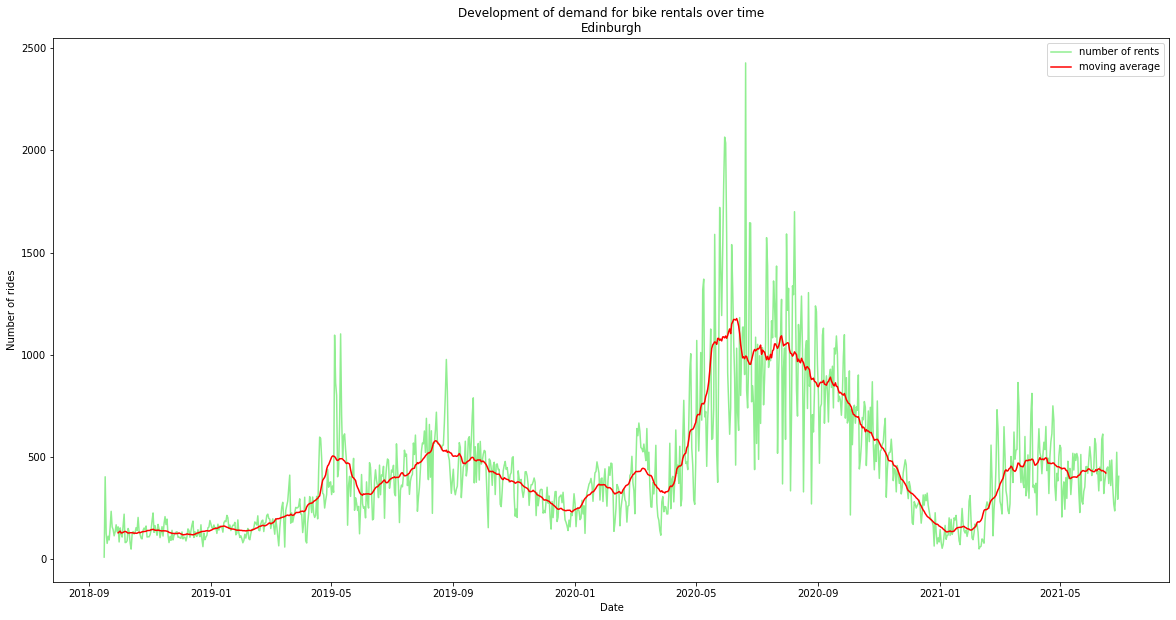

In [10]:
#@markdown Select `from_date` and `to_date` where you want to show the plot:

#@markdown (the oldest date 2018-09-15, the latest date 2021-06-30)

# adding new column in date format
df_bikes['date'] = df_bikes['started_at_dt'].dt.date
df_bikes['date'] = pd.to_datetime(df_bikes['date'])

# group dataframe by days 
df_rents = df_bikes[['date', 'index']].groupby('date').count().reset_index()

# rename index column to Number of rents
df_rents.rename(columns={"index": "number_of_rents"}, inplace=True)



# adding new column with moving average
df_rents['mov_avg'] = df_rents['number_of_rents'].rolling(
                                            window=30, 
                                            center=True).mean().round(2)


from_date = '2018-09-15' #@param {type:"date"}
to_date = '2021-06-30' #@param {type:"date"}

df_time_selection = df_rents[(df_rents['date'] > from_date) & (df_rents['date'] < to_date)]


# Create figure and plot space
fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.plot(df_time_selection['date'],
        df_time_selection['number_of_rents'],
        color='lightgreen',
        label='number of rents')
ax.plot(df_time_selection['date'],
        df_time_selection['mov_avg'],
        color='red',
        label='moving average')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of rides",
       title="Development of demand for bike rentals over time\nEdinburgh")
ax.legend()

plt.show()